# Machine Learning
Ilyas Ustun  
@\_ilyas_ustun\_  

# Model Evaluation
- Performance metrics
- Single hyper-parameter tuning
- Validation curve
- Learning curve

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(suppress=True)

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import sklearn
sklearn.__version__

'1.0.2'

Heart Disease data from uci ml website  
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [4]:
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
             'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','num']

# reading a file directly from the internet
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', 
                 header=None, names=col_names) 

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
df.shape

(303, 14)

## Preprocess data

In [8]:
df.num.unique() # will show you how many unique values are in the data set for the column

array([0, 2, 1, 3, 4], dtype=int64)

In [9]:
df.num.value_counts() # counts how many values are in the variable for each value

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [10]:
df['num'] = np.where(df.num==0, 0, 1) # we combine everything as 0 and 1 plus 1, 2, 3, 4 will become 1

In [11]:
df.num.unique()

array([0, 1])

In [12]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

<p>This column has a question mark and this is why it is of object type. </p>

In [13]:
df.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

<p>The same that applies to this column and it the same problem.</p>

###  The question mark '?' is not a missing value so we shall have to replace the '?' with NAN

In [14]:
df.replace('?', np.nan, inplace=True) # '?' has been replaced with nan

In [15]:
# to confirm the change
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', nan], dtype=object)

<p>Now that we changed the '?' to nan, we can convert the colum into a numeric type.</p>

In [16]:
df.ca = df.ca.astype(np.float)

In [17]:
df.thal = df.thal.astype(np.float)

<p>Now when we chaeck the unique values, everything looks numeric.</p>

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int32  
dtypes: float64(13), int32(1)
memory usage: 32.1 KB


In [19]:
df.num.value_counts() # balanced data

0    164
1    139
Name: num, dtype: int64

<p>This shows that there are 164 points in class 0 and 139 points in class 1.</p>

In [20]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

<p>This shows us the missing values in both ca and thal columns.</p>

## Visualize

Visualization is an important part of data analysis and its value should not be underestimated.

In [21]:
df_small = df[['age', 'cp', 'chol', 'num']]

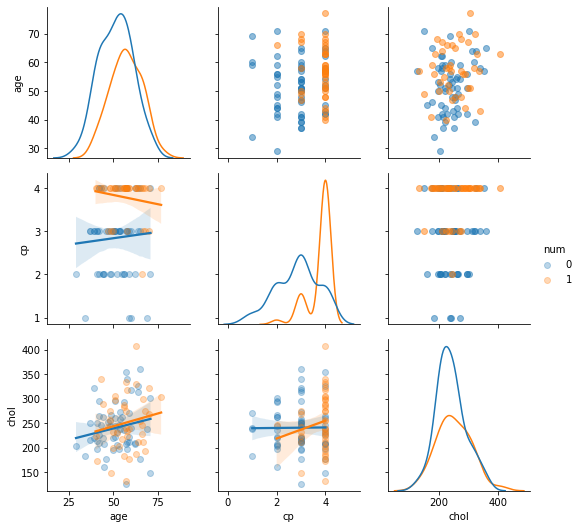

In [22]:
g=sns.PairGrid(data=df_small.sample(100), diag_sharey= False, hue='num')
# g.map_diag(plt.hist, bins=20, alpha=0.9, density=False, histtype='barstacked')
g.map_diag(sns.kdeplot)
g.map_upper(plt.scatter, alpha = 0.5)
g.map_lower(sns.regplot,fit_reg= True, scatter_kws={'alpha':0.3})

g.add_legend()

## Train-Test split

In [23]:
X = df.drop('num', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [24]:
y = df.num
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: num, Length: 303, dtype: int32

In [25]:
from sklearn.model_selection import train_test_split
# test_size of 0.2 defines that I want 20% to go into my testing
# random_state with a number defines that you have the same result.
# stratify split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=y) 

In [26]:
pd.DataFrame(x_train).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 210 to 21
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    float64
 1   sex       242 non-null    float64
 2   cp        242 non-null    float64
 3   trestbps  242 non-null    float64
 4   chol      242 non-null    float64
 5   fbs       242 non-null    float64
 6   restecg   242 non-null    float64
 7   thalach   242 non-null    float64
 8   exang     242 non-null    float64
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    float64
 11  ca        240 non-null    float64
 12  thal      240 non-null    float64
dtypes: float64(13)
memory usage: 26.5 KB


In [27]:
pd.DataFrame(y_train).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 210 to 21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     242 non-null    int32
dtypes: int32(1)
memory usage: 2.8 KB


In [28]:
pd.DataFrame(x_test).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 143 to 135
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       61 non-null     float64
 1   sex       61 non-null     float64
 2   cp        61 non-null     float64
 3   trestbps  61 non-null     float64
 4   chol      61 non-null     float64
 5   fbs       61 non-null     float64
 6   restecg   61 non-null     float64
 7   thalach   61 non-null     float64
 8   exang     61 non-null     float64
 9   oldpeak   61 non-null     float64
 10  slope     61 non-null     float64
 11  ca        59 non-null     float64
 12  thal      61 non-null     float64
dtypes: float64(13)
memory usage: 6.7 KB


In [29]:
pd.DataFrame(y_test).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 143 to 135
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     61 non-null     int32
dtypes: int32(1)
memory usage: 732.0 bytes


<p>We just checked how our splits are.</p>

## Imputing NaN

In [30]:
from sklearn.impute import SimpleImputer

<p>ca and thal variables are categorical. So, when we use simple imputation, the correct method is to use then most_frequent occurence.</p>

In [31]:
# here we instanciate this simpleImputer.
imputer = SimpleImputer(strategy='most_frequent') 

In [32]:
# we fit it on the training data.
imputer.fit(x_train)

SimpleImputer(strategy='most_frequent')

In [33]:
# it also has fit and transform functions
# it makes the necessary transformations.
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)

<p>All these changes occur on the variables ca and thal with missing values.</p>

In [34]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [35]:
# converting x_train into a pandas Data Frame
x_train = pd.DataFrame(x_train, columns=X.columns)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    float64
 1   sex       242 non-null    float64
 2   cp        242 non-null    float64
 3   trestbps  242 non-null    float64
 4   chol      242 non-null    float64
 5   fbs       242 non-null    float64
 6   restecg   242 non-null    float64
 7   thalach   242 non-null    float64
 8   exang     242 non-null    float64
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    float64
 11  ca        242 non-null    float64
 12  thal      242 non-null    float64
dtypes: float64(13)
memory usage: 24.7 KB


In [36]:
# converting x_test into a pandas Data Frame
x_test = pd.DataFrame(x_test, columns=X.columns)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       61 non-null     float64
 1   sex       61 non-null     float64
 2   cp        61 non-null     float64
 3   trestbps  61 non-null     float64
 4   chol      61 non-null     float64
 5   fbs       61 non-null     float64
 6   restecg   61 non-null     float64
 7   thalach   61 non-null     float64
 8   exang     61 non-null     float64
 9   oldpeak   61 non-null     float64
 10  slope     61 non-null     float64
 11  ca        61 non-null     float64
 12  thal      61 non-null     float64
dtypes: float64(13)
memory usage: 6.3 KB


<p>Checking our data frames shows that there are no more missing values.</p>

## One Hot Encoding

### 1. Dummy encoding using pandas

The train test split should be done after the one hot encoding using pandas.  
We will merge the train and test sets, and split them back into train and test sets.

In [37]:
x_train_dummy = x_train.copy() # creating new data frames
x_test_dummy = x_test.copy()

# we shall make use of these columns
x_train_dummy['train_test'] = 'train' # we create new columns
x_test_dummy['train_test'] = 'test'

In [38]:
# axis = 0 means take first the training set and put the test set under neath it
x_combi = pd.concat([x_train_dummy, x_test_dummy], axis = 0) 

In [39]:
# 'cp', 'restecg', 'slope', 'thal' are categorical variables which need to be converted into dummy variables
x_combi = pd.get_dummies(data=x_combi, columns=['cp', 'restecg', 'slope', 'thal']) 

In [40]:
x_combi.head() # all these columns have cp1, cp2, cp3, e.tc

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,train_test,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,37.0,0.0,120.0,215.0,0.0,170.0,0.0,0.0,0.0,train,...,0,1,0,0,1,0,0,1,0,0
1,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,train,...,1,1,0,0,0,1,0,0,0,1
2,69.0,1.0,160.0,234.0,1.0,131.0,0.0,0.1,1.0,train,...,0,0,0,1,0,1,0,1,0,0
3,43.0,1.0,120.0,177.0,0.0,120.0,1.0,2.5,0.0,train,...,1,0,0,1,0,1,0,0,0,1
4,58.0,0.0,130.0,197.0,0.0,131.0,0.0,0.6,0.0,train,...,1,1,0,0,0,1,0,1,0,0


In [41]:
x_train_dummy = x_combi.loc[x_combi['train_test'] == 'train', :]
x_test_dummy = x_combi.loc[x_combi['train_test'] == 'test', :]

<p>We are using the train_test column to get back the train and test sets.</p>

In [42]:
x_train_dummy = x_train_dummy.drop('train_test', axis=1)
x_test_dummy = x_test_dummy.drop('train_test', axis=1)

In [43]:
x_train_dummy.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0',
       'restecg_1.0', 'restecg_2.0', 'slope_1.0', 'slope_2.0', 'slope_3.0',
       'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

In [44]:
x_test_dummy.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0',
       'restecg_1.0', 'restecg_2.0', 'slope_1.0', 'slope_2.0', 'slope_3.0',
       'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

<p>This is one way to do the encoding which is easier.</p>

# 2. onehot encoding using variable names in sklearn

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer

In [46]:
ohe = OneHotEncoder() # instanciate an encoder object

In [47]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [48]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [49]:
# we create a column transfomer
ct = ColumnTransformer(transformers=[('ohe', ohe, ['cp', 'restecg', 'slope', 'thal'])], remainder='passthrough')
# remainder='passthrough' keeps all the other columns

In [50]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,37.0,0.0,3.0,120.0,215.0,0.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0
1,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
2,69.0,1.0,1.0,160.0,234.0,1.0,2.0,131.0,0.0,0.1,2.0,1.0,3.0
3,43.0,1.0,4.0,120.0,177.0,0.0,2.0,120.0,1.0,2.5,2.0,0.0,7.0
4,58.0,0.0,4.0,130.0,197.0,0.0,0.0,131.0,0.0,0.6,2.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0
238,56.0,1.0,1.0,120.0,193.0,0.0,2.0,162.0,0.0,1.9,2.0,0.0,7.0
239,44.0,1.0,4.0,112.0,290.0,0.0,2.0,153.0,0.0,0.0,1.0,1.0,3.0
240,59.0,1.0,2.0,140.0,221.0,0.0,0.0,164.0,1.0,0.0,1.0,0.0,3.0


In [51]:
ct.fit(x_train) # it applies the transformation to the four columns specified

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(),
                                 ['cp', 'restecg', 'slope', 'thal'])])

In [52]:
ct.transform(x_train).shape
# looking at the shape, you will have many columns

(242, 22)

In [53]:
df['cp'].unique()

array([1., 4., 3., 2.])

In [54]:
ct.transformers_[0][1].categories_ # shows all the unque values from columns ['cp', 'restecg', 'slope', 'thal']

[array([1., 2., 3., 4.]),
 array([0., 1., 2.]),
 array([1., 2., 3.]),
 array([3., 6., 7.])]

In [55]:
x_train2 = ct.transform(x_train)
x_test2 = ct.transform(x_test)

In [56]:
x_train2[0] # the output is a numpy array without any columns, this is after the transformation is done 

array([  0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,
         0.,   0.,  37.,   0., 120., 215.,   0., 170.,   0.,   0.,   0.])

In [57]:
# ct.get_feature_names_out # this gives you the column names of the corresponding values in the numpy array, x_train2.
# why this doesn't execute

In [58]:
# ct?

<p>Make sure that both train and test sets have same number of columns.</p>

In [59]:
x_train2.shape

(242, 22)

In [60]:
x_test2.shape

(61, 22)

# 3. Onehot encoding using mask in sklearn

In [61]:
# get columns mask for the categorical columns
mask = X.columns.isin(['cp', 'restecg', 'slope', 'thal'])
mask

array([False, False,  True, False, False, False,  True, False, False,
       False,  True, False,  True])

In [62]:
# using mask an input
ct2 = make_column_transformer((OneHotEncoder(sparse=False), mask), remainder='passthrough')

In [63]:
ct2.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 array([False, False,  True, False, False, False,  True, False, False,
       False,  True, False,  True]))])

In [64]:
x_train3 = ct2.transform(x_train)
x_test3 = ct2.transform(x_test)

In [65]:
# checking if x_train2 and x_train3 are equal to each other
np.not_equal(x_train2, x_train3).sum()

0

<p>Our data has been cleaned and transformed. We are now ready to apply machine learning. </p>

# Logistic Regression

In [66]:
# you also use 
from sklearn import linear_model
linear_model.LogisticRegression()

LogisticRegression()

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
from sklearn import metrics

In [69]:
clf = LogisticRegression(max_iter=5000)

In [70]:
clf.fit(x_train2, y_train)

LogisticRegression(max_iter=5000)

In [71]:
clf.classes_

array([0, 1])

In [72]:
print('Iterations:', clf.n_iter_)

Iterations: [901]


In [73]:
# making opredictions on our test set
pred = clf.predict(x_test3)

In [74]:
metrics.accuracy_score(y_test, pred)

0.9016393442622951

In [75]:
# or you can use
(y_test == pred).mean()

0.9016393442622951

In [76]:
metrics.zero_one_loss(y_test,pred) + metrics.accuracy_score(y_test, pred)
# this should give you 1.0

1.0

In [77]:
pd.DataFrame(metrics.confusion_matrix(y_test, pred))

,0,1
0,32,1
1,5,23


# Why this can't execute

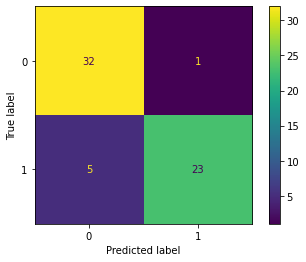

In [78]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred)

In [79]:
metrics.recall_score(y_test, pred, pos_label=1) # pos_label = 1 is recall, pos_label = 0 is specificity

0.8214285714285714

In [80]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.96      0.82      0.88        28

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



In [81]:
clf = LogisticRegression(C=1)

In [82]:
# these are c_vals (penalty values) which I am going to apply 
C_vals = [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1, 2, 5, 10, 15, 20, 50, 100, 1000, 10000, 100000]
C_vals

[0.0001,
 0.001,
 0.01,
 0.03,
 0.1,
 0.3,
 1,
 2,
 5,
 10,
 15,
 20,
 50,
 100,
 1000,
 10000,
 100000]

In [83]:
scores = []
# we create a for loop here and within it we instanciate logisticRegression object, that we we fit on training data and so on
for C in C_vals:
    clf = LogisticRegression(C=C, max_iter=2000) 
    clf.fit(x_train3, y_train)
    print('Iterations:', clf.n_iter_)
    pred=clf.predict(x_test3)
    scores.append(metrics.zero_one_loss(y_test, pred))  # calculate the error rate that we append to the score lists

Iterations: [69]
Iterations: [47]
Iterations: [41]
Iterations: [251]
Iterations: [402]
Iterations: [806]
Iterations: [901]
Iterations: [1082]
Iterations: [1439]
Iterations: [1574]
Iterations: [1624]
Iterations: [780]
Iterations: [674]
Iterations: [731]
Iterations: [786]
Iterations: [847]
Iterations: [778]


In [84]:
scores

[0.4098360655737705,
 0.4098360655737705,
 0.3278688524590164,
 0.180327868852459,
 0.08196721311475408,
 0.09836065573770492,
 0.09836065573770492,
 0.1311475409836066,
 0.1311475409836066,
 0.1311475409836066,
 0.1311475409836066,
 0.1311475409836066,
 0.1311475409836066,
 0.1311475409836066,
 0.1311475409836066,
 0.1311475409836066,
 0.1311475409836066]

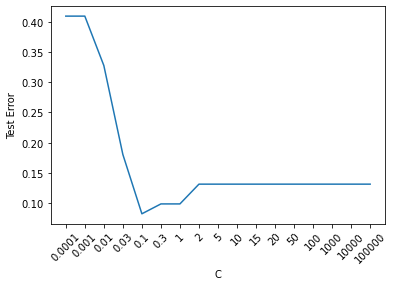

In [85]:
plt.plot(scores)
plt.xticks(np.arange(len(C_vals)), C_vals, rotation=45)
plt.xlabel('C')
plt.ylabel('Test Error')

plt.show()

<p>From the graph above, 0.1 will be a good choice for our c value.</p>

## Diagnosing bias and variance problems

#### Create Train - Validation Set

In [86]:
X_train_val, X_val, y_train_val, y_val = train_test_split(x_train2, y_train, test_size= 0.20, random_state=20)
# here we took the training set that we had and split it into the training and validation portion
# this is the proper way, I should be using it only once in the process of learning.

### Validation Curve

In [87]:
scores_tr = []
scores_val = []
# here we are going to calculate our training and validation score
for C in C_vals:
    clf = LogisticRegression(C=C, max_iter=2000)
    clf.fit(X_train_val, y_train_val)
    print('Iterations:',clf.n_iter_)

    pred=clf.predict(X_train_val)
    scores_tr.append(metrics.accuracy_score(y_train_val, pred))
    
    pred=clf.predict(X_val)
    scores_val.append(metrics.accuracy_score(y_val, pred))

Iterations: [47]
Iterations: [64]
Iterations: [190]
Iterations: [311]
Iterations: [99]
Iterations: [687]
Iterations: [929]
Iterations: [1089]
Iterations: [1260]
Iterations: [1141]
Iterations: [862]
Iterations: [1394]
Iterations: [634]
Iterations: [881]
Iterations: [746]
Iterations: [753]
Iterations: [751]


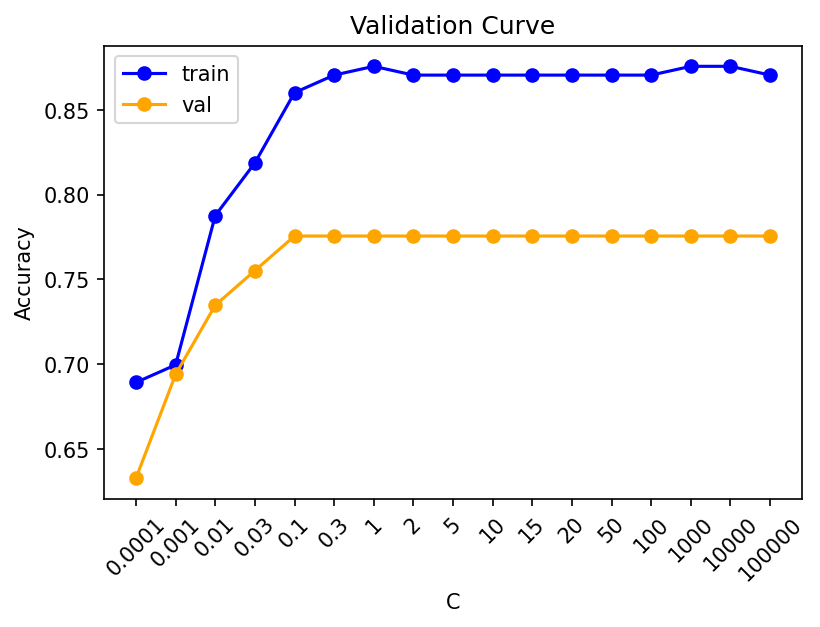

In [88]:
f, ax = plt.subplots(dpi=150)
plt.plot(scores_tr, marker='o', color='blue', label = 'train')
plt.plot(scores_val, color='orange', marker='o', label = 'val')
plt.title('Validation Curve')
plt.xticks(ticks=np.arange(len(C_vals)), labels=C_vals, rotation=45)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ax.set_xticks(list(range(len(C_vals))))
# ax.set_xticklabels([str(C) for C in C_vals], rotation=90)

<p>The training curve is blue color, validation curve is orange color. On the x-axis, there are different c values from small to large, both training and validation accuracy increase and increase then at some point they stay constant. As you can see the blue curve is much higher than the orange curve and this means that training accuracy is much higher than the validation accuracy. The training accuracy is around 0.87 and validation accuracy is 0.77, there is a difference of about 10% which is a large gap meaning that this model might be overfitting because of this large gap, we want this gap to close abit more. This is what this validation curve is telling us. The best value of c is around 0.1.</p>

### Learning Curve

- We will start with minimum number of points in training, and gradually increase the training set size.
- In classification, the minimum number of points should have at least one point from each target class.
    - Otherwise you'll get anerror similar to this:  
      - `ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0`

In [89]:
y_train_val

200    0
34     0
225    0
69     1
14     0
      ..
235    1
136    1
63     0
40     1
9      1
Name: num, Length: 193, dtype: int32

In [90]:
X_train_val.shape[0]

193

In [91]:
accuracy_train = []
accuracy_val = []
clf = LogisticRegression(max_iter = 1000, solver='lbfgs', penalty='l2', C=1, verbose=0)
# so here we start with 5 points and on each iteration we increase by 10
num_points = list(range(5, X_train_val.shape[0], 10))

for n in num_points:
    # within the for loop we increase the number of points each time
    clf.fit(X_train_val[0:n, :], y_train_val[0:n]) # fit the model
    # make prediction on the train set, train set keeps on changing since we are increasing the number of points
    pred_trn = clf.predict(X_train_val[0:n, :])    
    accuracy_train.append(metrics.accuracy_score(y_true = y_train_val[0:n], y_pred = pred_trn))
    pred_val = clf.predict(X_val) # make predictions on the validation set, the validation set is constant and it isn't changing
    accuracy_val.append(metrics.accuracy_score(y_true = y_val, y_pred = pred_val))

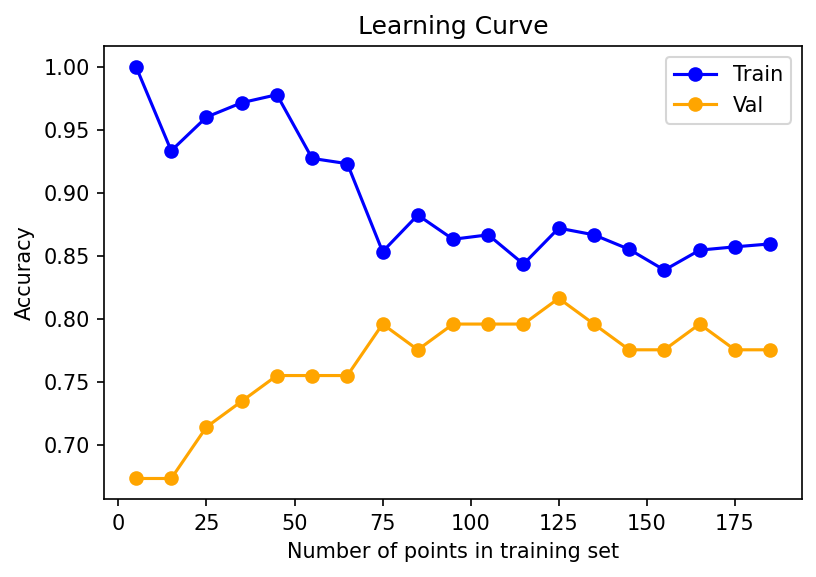

In [92]:
f, ax = plt.subplots(dpi=150)
ax.plot(num_points, accuracy_train, marker='o', color='blue', label='Train')
ax.plot(num_points, accuracy_val, marker='o', color='orange', label='Val')
ax.set_xlabel('Number of points in training set')
ax.set_ylabel('Accuracy')
ax.set_title("Learning Curve")
# ax.set_xticks(np.arange(len(num_points)))
# ax.set_xticklabels(num_points, rotation=90)
ax.legend();

<p>As we increase the number of points in our training set. The blue is the training accuracy, orange is validation accuracy. Training accuracy starts very hight because they are few points at the beginning and it over fits and as we increase the number of training points, overfitting decreases gradually. Validation accuracy at the beginning is useless, but it keeps increaseing  slowly and at some point around ,125, it is kind of constant. Training and validation accuracy donot change after 125 </p>

Decreasing the interval length among the number of training points used, will allow for smoother curves.

In [93]:
accuracy_train = []
accuracy_val = []
clf = LogisticRegression(max_iter = 1000, solver='lbfgs', penalty='l2', C=1, verbose=0)

num_points = list(range(5, X_train_val.shape[0], 5))

for n in num_points:
    clf.fit(X_train_val[0:n, :], y_train_val[0:n])
    pred_trn = clf.predict(X_train_val[0:n, :])
    accuracy_train.append(metrics.accuracy_score(y_true = y_train_val[0:n], y_pred = pred_trn))
    pred_val = clf.predict(X_val)
    accuracy_val.append(metrics.accuracy_score(y_true = y_val, y_pred = pred_val))

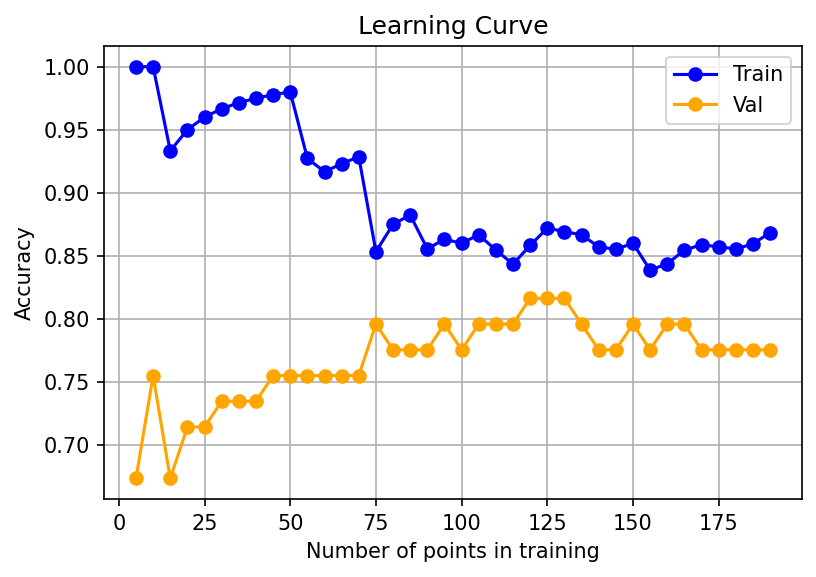

In [94]:
f, ax = plt.subplots(dpi=150)
ax.plot(num_points, accuracy_train, marker='o', color='blue', label='Train')
ax.plot(num_points, accuracy_val, marker='o', color='orange', label='Val')
ax.set_xlabel('Number of points in training')
ax.set_ylabel('Accuracy')
ax.set_title("Learning Curve")
# ax.set_xticks(np.arange(len(num_points)))
# ax.set_xticklabels(num_points, rotation=90)
ax.legend();
ax.grid()

<p>Once we decrease the increment by 5, we have a finner figure</p>

## Exercise:

- Choose a classification model.
- Choose a single hyper-parameter for this model.
- Create validation and learning curves similar to the ones above.
- Compare the performance of your model to the logistic regression model using the test set. Which one is better?

The End  
Ilyas Ustun  
